In [1]:
# Importing all necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)
tf.config.list_physical_devices()

2.9.2


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
img_width, img_height = 217, 217

In [5]:
train_data_dir = '../data/dataset/training'
validation_data_dir = '../data/dataset/validation'
nb_train_samples = 31125
nb_validation_samples = 11880
epochs = 10 #300
batch_size = 32

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgba',
    class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgba',
    class_mode='categorical')

Found 31125 images belonging to 8 classes.
Found 11880 images belonging to 8 classes.


In [7]:
print(train_generator.image_shape)
print(validation_generator.image_shape)

(217, 217, 4)
(217, 217, 4)


In [8]:
# Calculate the class weights - Reference: https://stackoverflow.com/questions/42586475/is-it-possible-to-automatically-infer-the-class-weight-from-flow-from-directory
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}    

In [9]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(img_width, img_height, 4), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-07-21 14:36:30.905429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 14:36:30.905591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 16)      592       
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 725904)            0         
                                                                 
 dense (Dense)               (None, 128)               92915840  
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 92,919,784
Trainable params: 92,919,784
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    class_weight=class_weights)

Epoch 1/10


2022-07-21 14:38:03.361994: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-21 14:38:03.692446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


972/972 [==============================] - ETA: 0s - loss: 8.0371 - acc: 0.4884

2022-07-21 14:43:51.796624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


972/972 [==============================] - 470s 483ms/step - loss: 8.0371 - acc: 0.4884 - val_loss: 0.8623 - val_acc: 0.6317
Epoch 2/10
972/972 [==============================] - 469s 483ms/step - loss: 3.8814 - acc: 0.5674 - val_loss: 0.8454 - val_acc: 0.6359
Epoch 3/10
972/972 [==============================] - 469s 482ms/step - loss: 3.4363 - acc: 0.6004 - val_loss: 0.8549 - val_acc: 0.6317
Epoch 4/10
972/972 [==============================] - 692s 712ms/step - loss: 3.2335 - acc: 0.6200 - val_loss: 0.7996 - val_acc: 0.6701
Epoch 5/10
972/972 [==============================] - 739s 761ms/step - loss: 3.1712 - acc: 0.6263 - val_loss: 0.8632 - val_acc: 0.6460
Epoch 6/10
972/972 [==============================] - 579s 596ms/step - loss: 2.9955 - acc: 0.6418 - val_loss: 0.7077 - val_acc: 0.6985
Epoch 7/10
370/972 [==========>...................] - ETA: 3:35 - loss: 2.9972 - acc: 0.6509

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x29ad3fa90>
    label = <none> 
    device = <AGXG13XDevice: 0x11ea37c00>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x12f62be00>
        label = <none> 
        device = <AGXG13XDevice: 0x11ea37c00>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 527s 542ms/step - loss: 3.1826 - acc: 0.6385 - val_loss: 0.8691 - val_acc: 0.6511
Epoch 8/10
780/972 [=======================>......] - ETA: 1:51 - loss: 2.8270 - acc: 0.6545

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x28cb495e0>
    label = <none> 
    device = <AGXG13XDevice: 0x11ea37c00>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x12f62be00>
        label = <none> 
        device = <AGXG13XDevice: 0x11ea37c00>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 645s 664ms/step - loss: 2.8919 - acc: 0.6475 - val_loss: 0.7597 - val_acc: 0.6795
Epoch 9/10
972/972 [==============================] - 471s 484ms/step - loss: 2.7925 - acc: 0.6608 - val_loss: 0.6248 - val_acc: 0.7386
Epoch 10/10
972/972 [==============================] - 555s 571ms/step - loss: 2.8352 - acc: 0.6546 - val_loss: 0.7289 - val_acc: 0.6982


In [13]:
model.save_weights('../models/candlestick_classification_CNN_tf.h5')

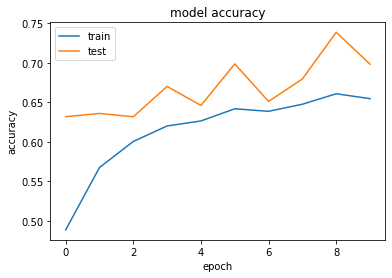

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

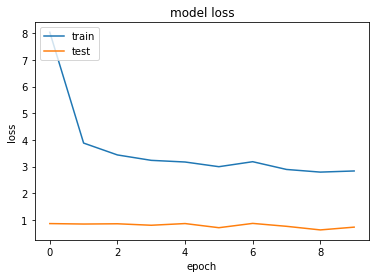

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()